# Assignment 7a

In [1]:
#%matplotlib qt 
# Needed to ge the animation visualization working

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import rain_mod 
from IPython.display import Image


<b>Figure Staggered Grid</b>: The staggered grid for the drop in the pond problem.
</div>

The original equations, boundary and initial conditions are changed to
reflect the staggered case. The equations are changed to the following:

(Staggered, Eqn 1)
$$\frac {u_{i}(t+dt)-u_{i}(t-dt)}{2 dt} + g \frac {h_{i + 1}(t) - h_{i}(t)}{dx} = 0$$

(Staggered, Eqn 2)
$$\frac {h_{i}(t+dt)-h_{i}(t-dt)}{2 dt} + H \frac {u_{i}(t) - u_{i - 1}(t)}{dx} = 0$$


The initial conditions are: At $t = 0$ and $t = dt$, all points have
zero elevation except at $h_{3}$, where 
$$h_{3}(0) = h_{0}$$
$$h_{3}(dt) = h_{3}(0) - h_{0} Hg \frac{dt^2}{dx^2}$$ 
At $t = 0$ and
$t = dt$, all points have zero velocity except at $u_{2}$ and $u_{3}$,
where 
$$u_{2}(dt) = - h_{0} g \frac{dt}{dx}$$
$$u_{3}(dt) = - u_{2}(dt)$$ 
This time we assume there is a wall at
$u_{1}$ and $u_{4}$, so we will ignore the value of $h_{1}$. The
boundary conditions are: 
$$u_{1}(t) = 0$$ 
$$u_{4}(t) = 0$$

### Problem One
[lab7:prob:staggered]:(#Problem-One)

Modify *rain.py* to solve this problem (Simple
equations on a staggered grid). Submit your code and a final plot for
one case.


In order to test the correctness of the code, I introduced a gaussian initial condition setting. Travelling gaussians remain gaussian as it propagates in time and space. For an initial stationary gaussian perturbation, it can be decomposed into two left- and right- propagating gaussian wavepackets. At a stiff boundary (no flux through the surface) we expect the gaussian waveforms to be reflected in a way that retains its gaussian profile. In addition, since shallow water waves are non-dispersive, we expect the width of the gaussian to remain constant over time.

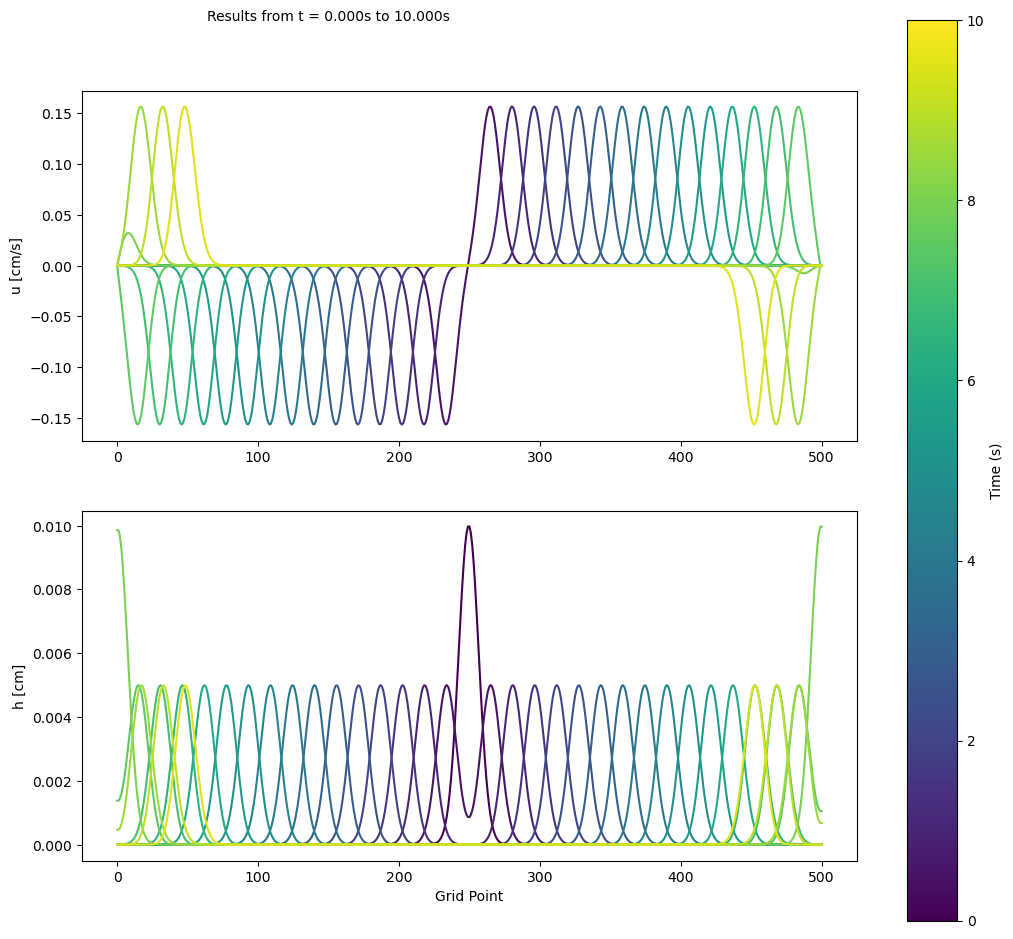

In [2]:
u, h, dt, n_time = rain_mod.rain([1000, 501], setting='gaussian')

In [3]:
'''
fig, (ax_u, ax_h) = plt.subplots(2,1, figsize=(10,10))
the_title = fig.text(0.25, 0.95, 'Results from t = %.3fs to %.3fs' % (0, dt*n_time))
# Set the figure title, and the axes labels.

def animate(time):
    ax_u.clear()
    ax_h.clear()
    ax_u.set_title('t = %.3f' % (2*dt*time))
    ax_h.set_title('t = %.3f' % (2*dt*time))
    ax_u.plot(u.store[:, 2*time])
    ax_h.plot(h.store[:, 2*time])
    ax_u.set_ylabel('u [cm/s]')
    ax_h.set_ylabel('h [cm]')
    ax_h.set_xlabel('Grid Point')
    ax_u.set_ylim(-0.16, 0.16)
    ax_h.set_ylim(-0.004, 0.012)
    
anim = animation.FuncAnimation(fig, animate, frames=n_time//2, interval=1, blit=False, repeat=True)
plt.show()
writergif = animation.PillowWriter(fps=20)
anim.save(r'gaussian.gif',writer=writergif)
'''


"\nfig, (ax_u, ax_h) = plt.subplots(2,1, figsize=(10,10))\nthe_title = fig.text(0.25, 0.95, 'Results from t = %.3fs to %.3fs' % (0, dt*n_time))\n# Set the figure title, and the axes labels.\n\ndef animate(time):\n    ax_u.clear()\n    ax_h.clear()\n    ax_u.set_title('t = %.3f' % (2*dt*time))\n    ax_h.set_title('t = %.3f' % (2*dt*time))\n    ax_u.plot(u.store[:, 2*time])\n    ax_h.plot(h.store[:, 2*time])\n    ax_u.set_ylabel('u [cm/s]')\n    ax_h.set_ylabel('h [cm]')\n    ax_h.set_xlabel('Grid Point')\n    ax_u.set_ylim(-0.16, 0.16)\n    ax_h.set_ylim(-0.004, 0.012)\n    \nanim = animation.FuncAnimation(fig, animate, frames=n_time//2, interval=1, blit=False, repeat=True)\nplt.show()\nwritergif = animation.PillowWriter(fps=20)\nanim.save(r'gaussian.gif',writer=writergif)\n"

As seen in the plot and animation, the output of the simulation is as expected. Now running the original initial condition (a dirac-delta distribution):

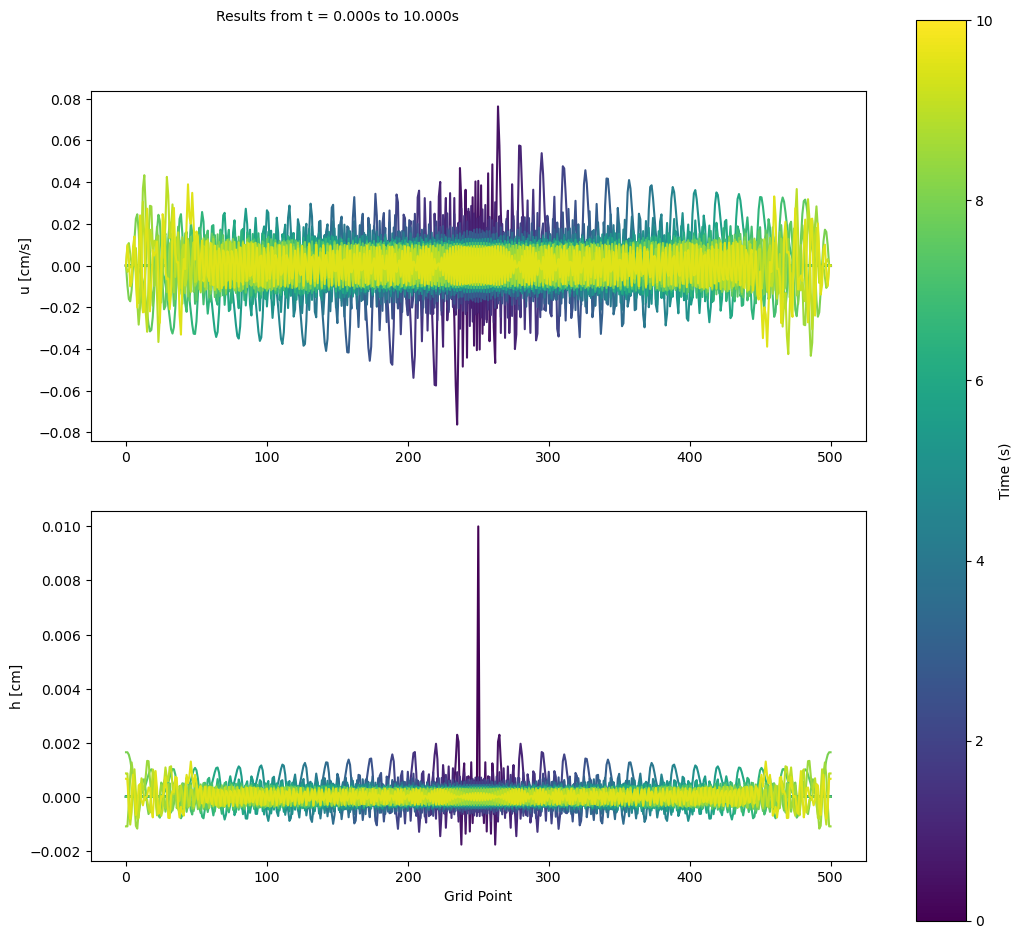

In [4]:
u, h, dt, n_time = rain_mod.rain([1000, 501], setting='point')

In [5]:
'''
fig, (ax_u, ax_h) = plt.subplots(2,1, figsize=(10,10))
the_title = fig.text(0.25, 0.95, 'Results from t = %.3fs to %.3fs' % (0, dt*n_time))
# Set the figure title, and the axes labels.

def animate(time):
    ax_u.clear()
    ax_h.clear()
    ax_u.set_title('t = %.3f' % (2*dt*time))
    ax_h.set_title('t = %.3f' % (2*dt*time))
    ax_u.plot(u.store[:, 2*time])
    ax_h.plot(h.store[:, 2*time])
    ax_u.set_ylabel('u [cm/s]')
    ax_h.set_ylabel('h [cm]')
    ax_h.set_xlabel('Grid Point')
    ax_u.set_ylim(-0.16, 0.16)
    ax_h.set_ylim(-0.004, 0.012)
    
anim = animation.FuncAnimation(fig, animate, frames=n_time//2, interval=1, blit=False, repeat=True)
plt.show()
writergif = animation.PillowWriter(fps=20)
anim.save(r'delta.gif',writer=writergif)
'''


"\nfig, (ax_u, ax_h) = plt.subplots(2,1, figsize=(10,10))\nthe_title = fig.text(0.25, 0.95, 'Results from t = %.3fs to %.3fs' % (0, dt*n_time))\n# Set the figure title, and the axes labels.\n\ndef animate(time):\n    ax_u.clear()\n    ax_h.clear()\n    ax_u.set_title('t = %.3f' % (2*dt*time))\n    ax_h.set_title('t = %.3f' % (2*dt*time))\n    ax_u.plot(u.store[:, 2*time])\n    ax_h.plot(h.store[:, 2*time])\n    ax_u.set_ylabel('u [cm/s]')\n    ax_h.set_ylabel('h [cm]')\n    ax_h.set_xlabel('Grid Point')\n    ax_u.set_ylim(-0.16, 0.16)\n    ax_h.set_ylim(-0.004, 0.012)\n    \nanim = animation.FuncAnimation(fig, animate, frames=n_time//2, interval=1, blit=False, repeat=True)\nplt.show()\nwritergif = animation.PillowWriter(fps=20)\nanim.save(r'delta.gif',writer=writergif)\n"

The fourier transform of a dirac-delta function is constant in k-space, therefore a dirac-delta perturbation has significant high-wavenumber modes that cannot be resolved with a finite grid, resulting in narrow triangle waves. 